## Evaluation

This notebook is intended to evaluate the performance of the model using qualitative and quantitative measures.

For the sake of this demo project, we just apply our model to the validation set of our dataset, and plot the confusion matrix for the measurements.

### Notebook setup

In [8]:
# Standard built-in modules
import os
import warnings

# Third-party modules
import matplotlib.pyplot as plt

# Local modules
from inference import InferenceModel
import metrics

# Configurations
warnings.filterwarnings("ignore")  
root_path = os.path.dirname(os.path.abspath(''))

### Confusion matrix

In [3]:
model = InferenceModel(model_arch='resnet18', use_dp=True)

---Inference logger: A model was built with resnet18 architecture.
---Inference logger: Searching for the best weight path from the weights directory based on the "val-loss" criterion.
---Inference logger: Weights for the model were loaded from: weights/Exp-1/Exp-1_2022-04-13_12-30-04/checkpoint_epoch0_step8_val-loss=0.30.pt
---Inference logger: Using Data Parallel with all available GPUs. "gpu_id" will be ignored.


In [4]:
# Get the test data and labels.

label_dict = {'NORMAL':0, 'PNEUMONIA':1}
img_paths = list()
labels = list()
for root, dirs, files in os.walk(f'..{os.path.sep}data{os.path.sep}test'):
    for file in files:
        if file.endswith('.jpeg'):
            img_paths.append(os.path.join(root, file))
            labels.append(label_dict[root.split(os.path.sep)[-1]])

In [5]:
# Run the inference

processed_outputs, _ = model.predict(img_paths)

---Inference logger: The dataset was built with length: 624
---Inference logger: Using GPU for inference with DDP model = True , batch size: 4, and 4 workers.


100%|██████████| 156/156 [00:12<00:00, 12.66it/s]


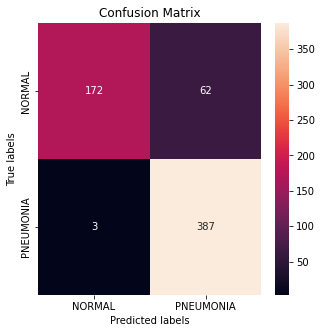

In [6]:
# Plot the confusion matrix

fig = metrics.plot_confusion_matrix(
    preds = processed_outputs, 
    labels = labels, 
    classes = ['NORMAL', 'PNEUMONIA']
)

In [10]:
fig.savefig(f'{root_path}{os.path.sep}outputs{os.path.sep}confusion_matrix.png')